In [2]:
import pandas as pd  
import numpy as np

df = pd.read_excel("refs.xlsx", sheet_name="refs", skiprows=[0,1],
                    dtype=str)
df.set_index("ID", inplace=True)
cols = ["Citations", "REF ID", "Cat", "ShortName","Suff", "KeyWord"]
df = df[cols]
df["Name"]= ["" for x in df["Suff"]]
df.fillna("", inplace=True)
for c in cols:
    df[c]= [str(x) for x in df[c]]
for i, row in df.iterrows():
    df.at[i,"Name"]=row["ShortName"]+str(row["Suff"])

df.drop(["ShortName", "Suff"],axis=1, inplace=True)
df

for i, row in df.iterrows():
    kw_ = row["KeyWord"]
    kw_ = kw_.replace("Data Center", "DC")
    kw_ = kw_.replace("Simulation", "Sim") 
    kw_ = kw_.replace("Software Development", "SoftDev")
    kw_ = kw_.replace("Energy Markets", "Markt") 
    df.at[i,"KeyWord"]=kw_

df




,Citations,REF ID,Cat,KeyWord,Name
ID,,,,,
1,1,"5, 13,16, 24",Report,CM; DC; EnEf; LCA,Al20
2,1,"8, 25",Contribution,EnTech; Sim; SoftDev,Fa22
3,9,"8, 25",Journal Article,Sim; SoftDev,Fe22
4,8,8,Journal Article,EnEf; EnTech; Sim; Markt,Kl22
5,1,22,Contribution,CM; LCA,KPP19
6,2,,Thesis,EnEf; Sim,Pe16
7,9,13,Contribution,DC; LCA; SoftDev,Pe19
8,8,,Contribution,EnEf; EnTech; Sim; SoftDev,Pe21a
9,2,"7,22,1",Contribution,DC; LCA,Pe21b


In [3]:
# Define the graph
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()


# Add nodes with properties
for i, row in df.iterrows():
    G.add_node(row["Name"], type=row["Cat"], weight=int(row["Citations"]))

# get unique keywords
keywors_=[]
for i, row in df.iterrows():
    kw = row["KeyWord"]
    kw=kw.replace(" ","")
    kw = kw.split(";")
    for k in kw:
        if k not in keywors_:
            keywors_.append(k)

for k in keywors_: 
    G.add_node(k, type="KW", weight=0)


In [4]:
# Add edges between nodes of citations
for i, row in df.iterrows():
    if len(row["REF ID"])>0:
        # convert to a list
        data = row["REF ID"]
        data = data.replace(" ", "")
        data = data.split(",")
        data = [str(d) for d in data]
        for d in data:
            #print(cit)

            G.add_edge(row["Name"], df.loc[d,"Name"])



# Add edges between nodes of keywords
for i, row in df.iterrows():
    kw = row["KeyWord"]
    kw=kw.replace(" ","")
    kw = kw.split(";")
    for k in kw:
        G.add_edge(row["Name"], k)

print(len(G))

35


In [5]:


# Define node colors based on type
node_colors = {'Report': 'red', 'Contribution': 'blue', 
               "Journal Article":"purple", "Thesis":"green",
                 "Presentation":"yellow", "KW":"black"}



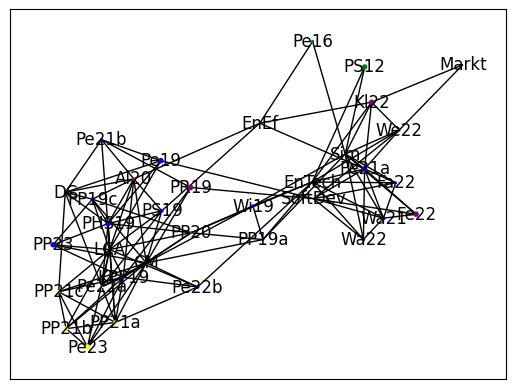

In [6]:


colors = [node_colors[G.nodes[node]['type']] for node in G.nodes()]

# Define node sizes based on weight
node_sizes = [G.nodes[node]['weight'] for node in G.nodes()]

# Plot the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color=colors, node_size=node_sizes, with_labels=True)

# Show the plot
plt.show()

In [7]:
Q=nx.DiGraph(G)


In [8]:
import plotly.graph_objs as go
pos = nx.spring_layout(G, iterations=100,k=0.5)
for n, p in pos.items():
    G.nodes[n]['pos'] = p
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.3, color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

In [9]:
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers+text',
    textposition="top center",

    hoverinfo='text',
    marker=dict(
        #symbol = "diamond",
        showscale=True,
        colorscale='viridis',
        reversescale=True,
        color=colors,
        size=[int(x)*3 for x in node_sizes],
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color'] += tuple([len(adjacencies[1])])
    node_info = adjacencies[0]
    node_trace['text'] += tuple([node_info])
title = "Network Graph Demonstration"
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                title=title,
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=21, l=5, r=5, t=40),
                # annotations=[dict(
                #     text="Text Here",
                #     showarrow=False,
                #     xref="paper", yref="paper")],
                xaxis=dict(showgrid=False, zeroline=False,
                           showticklabels=False, mirror=True),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False, mirror=True)))
fig.show()